In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 3
sns.set()

In [2]:
X = np.array([[2, 4], [2, 2], [4, 2]])
y = np.array([0, 0, 1])

In [3]:
from sklearn.svm import SVC
svm_model = SVC(kernel = "linear", C = 1e12)

SVM models are just linear models like we've seen before, i.e. after fitting, they have an intercept and weights for each feature.

In [4]:
svm_model.fit(X, y)

SVC(C=1000000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [5]:
svm_model.intercept_

array([-3.])

In [6]:
svm_model.coef_

array([[1., 0.]])

In [7]:
from matplotlib.colors import ListedColormap
def visualize_decision_boundaries(model, x_range, y_range):
    xx, yy = np.meshgrid(np.linspace(x_range[0], x_range[1], 500),
                     np.linspace(y_range[0], y_range[1], 500))

    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])
    y_hat = model.predict(np.c_[xx.ravel(), yy.ravel()])
    y_hat = y_hat.reshape(xx.shape)

    cs = plt.contourf(xx, yy, y_hat, cmap=sns_cmap)
    plt.xlabel("fare")
    plt.ylabel("age")

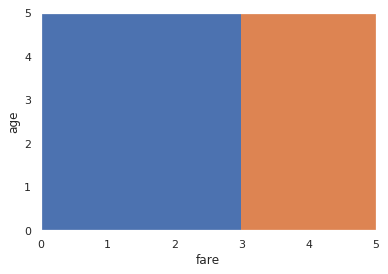

In [8]:
visualize_decision_boundaries(svm_model, [0, 5], [0, 5])

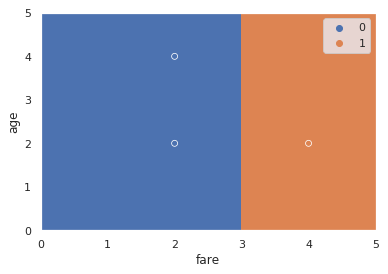

In [9]:
visualize_decision_boundaries(svm_model, [0, 5], [0, 5])
sns.scatterplot(X[:, 0], X[:, 1], y)
#plt.savefig("best_margin_challenge.png", dpi = 300, bbox_inches = "tight")

#### Example 2: Titanic Data Subset

In [145]:
df = sns.load_dataset("titanic")
p3_df = df[["age", "fare", "pclass", "sex", "survived"]].copy()
p3_df = p3_df.dropna()
p3_df['sex'] = p3_df['sex'].replace("male", 0)
p3_df['sex'] = p3_df['sex'].replace("female", 1)
np.random.seed(23)
p3_train, p3_test = np.split(p3_df, [600])

In [11]:
p3_df.head(5)

,age,fare,pclass,sex,survived
0,22.0,7.2500,3,0,0
1,38.0,71.2833,1,1,1
2,26.0,7.9250,3,1,1
3,35.0,53.1000,1,1,1
4,35.0,8.0500,3,0,0


In [12]:
sample_of_5 = p3_train[["fare", "age", "survived"]].sample(5, random_state = 35)
sample_of_5

,fare,age,survived
366,75.2500,60.0,1
360,27.9000,40.0,0
394,16.7000,24.0,1
206,15.8500,32.0,0
704,7.8542,26.0,0


In [13]:
X = sample_of_5[["fare", "age"]].to_numpy()
y = sample_of_5["survived"].to_numpy()

In [14]:
svm_model = SVC(kernel = "linear", C = 1e12)
svm_model.fit(X, y)

SVC(C=1000000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
svm_model.coef_

array([[ 0.17077537, -0.24454297]])

In [16]:
svm_model.intercept_

array([4.01699311])

Text(25,25,'b: 4, w: [0.17, -0.24]')

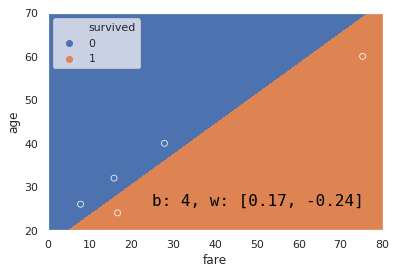

In [17]:
def b_and_w_to_string(b, w):    
    b = b[0]
    w1 = w[0, 0]
    w2 = w[0, 1]
    return f"b: {b:.0f}, w: [{w1:.2f}, {w2:.2f}]"

visualize_decision_boundaries(svm_model, [0, 80], [20, 70])
sns.scatterplot(data = sample_of_5, x = "fare", y = "age", hue = "survived")
title_font = {'fontname':'monospace', 'size':'16', 'color':'black', 'weight':'normal',
    'verticalalignment':'bottom'}
plt.text(25, 25, f"{b_and_w_to_string(svm_model.intercept_, svm_model.coef_)}", **title_font)
#plt.savefig("svm_titanic_subset.png", dpi = 300, bbox_inches = "tight")

#### Example 3: Full Titanic Dataset

In [18]:
X = p3_train[["fare", "age"]].to_numpy()
y = p3_train["survived"].to_numpy()

If we look at the full dataset below, we see that it is not linearly separable.

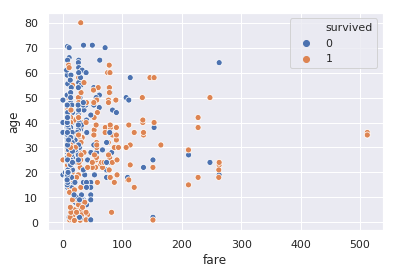

In [19]:
sns.scatterplot(data = p3_train, x = "fare", y = "age", hue = "survived")
#plt.savefig("full_titanic_data.png", dpi = 300, bbox_inches = "tight")

Just like a Perceptron, the code below will get caught in an infinite loop because there is no separating line between the two classes.

In [20]:
#svm_model = SVC(kernel = "linear", C = 1e12)
#svm_model.fit(X, y)

There are two ways around this. One is to apply stronger regularization with the `C` parameter. The other is to change the `kernel`. Let's explore these first in code. We'll later work on understanding the theory.

#### Adjusting Regularization Strength on Titanic Dataset

In [21]:
svm_model = SVC(kernel = "linear", C = 1)
svm_model.fit(X, y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
svm_model.coef_

array([[ 0.01773372, -0.00817427]])

In [23]:
svm_model.intercept_

array([-0.96209594])

In [24]:
from sklearn.metrics import accuracy_score

Text(100,75,'accuracy: 0.6483')

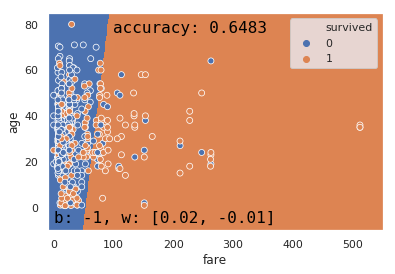

In [25]:
visualize_decision_boundaries(svm_model, [-10, 550], [-10, 85])
sns.scatterplot(data = p3_train, x = "fare", y = "age", hue = "survived")
title_font = {'fontname':'monospace', 'size':'16', 'color':'black', 'weight':'normal',
    'verticalalignment':'bottom'}
plt.text(0, -8, f"{b_and_w_to_string(svm_model.intercept_, svm_model.coef_)}", **title_font)
plt.text(100, 75, f"accuracy: {accuracy_score(p3_train['survived'], svm_model.predict(p3_train[['fare', 'age']])):.4f}", **title_font)
#plt.savefig("svm_full_titanic_data_C1.png", dpi = 300, bbox_inches = "tight")

Now again with `C = 10`:

In [26]:
svm_model = SVC(kernel = "linear", C = 10)
svm_model.fit(X, y)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
svm_model.coef_

array([[ 0.01757005, -0.00774244]])

In [28]:
svm_model.intercept_

array([-0.9684459])

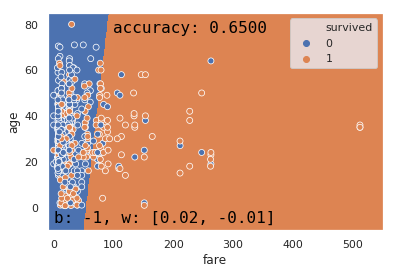

In [29]:
visualize_decision_boundaries(svm_model, [-10, 550], [-10, 85])
sns.scatterplot(data = p3_train, x = "fare", y = "age", hue = "survived")
plt.text(0, -8, f"{b_and_w_to_string(svm_model.intercept_, svm_model.coef_)}", **title_font)
plt.text(100, 75, f"accuracy: {accuracy_score(p3_train['survived'], svm_model.predict(p3_train[['fare', 'age']])):.4f}", **title_font)
plt.savefig("svm_full_titanic_data_C10.png", dpi = 300, bbox_inches = "tight")

In [30]:
svm_model = SVC(kernel = "linear", C = 100)
svm_model.fit(X, y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Text(100,75,'accuracy: 0.6533')

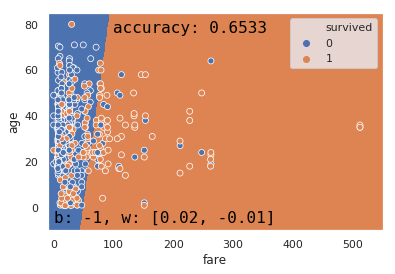

In [31]:
visualize_decision_boundaries(svm_model, [-10, 550], [-10, 85])
sns.scatterplot(data = p3_train, x = "fare", y = "age", hue = "survived")
plt.text(0, -8, f"{b_and_w_to_string(svm_model.intercept_, svm_model.coef_)}", **title_font)
plt.text(100, 75, f"accuracy: {accuracy_score(p3_train['survived'], svm_model.predict(p3_train[['fare', 'age']])):.4f}", **title_font)
#plt.savefig("svm_full_titanic_data_C100.png", dpi = 300, bbox_inches = "tight")

In [32]:
#pretty slow, so commented out!
#svm_model = SVC(kernel = "linear", C = 1000)
#svm_model.fit(X, y)

Text(100,75,'accuracy: 0.6533')

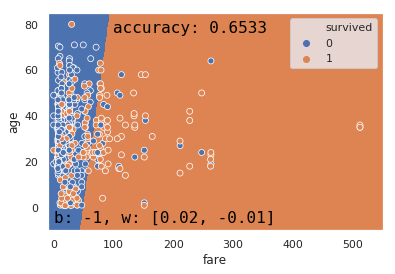

In [33]:
#visualize_decision_boundaries(svm_model, [-10, 550], [-10, 85])
#sns.scatterplot(data = p3_train, x = "fare", y = "age", hue = "survived")
#title_font = {'fontname':'monospace', 'size':'16', 'color':'black', 'weight':'normal',
#    'verticalalignment':'bottom'}
#plt.text(0, -8, f"{b_and_w_to_string(svm_model.intercept_, svm_model.coef_)}", **title_font)
#plt.text(100, 75, f"accuracy: {accuracy_score(p3_train['survived'], svm_model.predict(p3_train[['fare', 'age']])):.4f}", **title_font)
#plt.savefig("svm_full_titanic_data_C1000.png", dpi = 300, bbox_inches = "tight")

Below we can see the behavior of the polynomial SVM kernel. We will discuss this in more detail later.

In [34]:
svm_model = SVC(kernel = "poly", C = 1)
svm_model.fit(X, y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

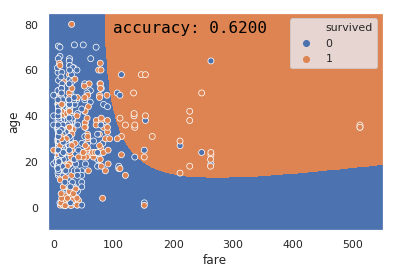

In [35]:
visualize_decision_boundaries(svm_model, [-10, 550], [-10, 85])
sns.scatterplot(data = p3_train, x = "fare", y = "age", hue = "survived")
#plt.text(0, -8, f"{b_and_w_to_string(svm_model.intercept_, svm_model.coef_)}", **title_font)
plt.text(100, 75, f"accuracy: {accuracy_score(p3_train['survived'], svm_model.predict(p3_train[['fare', 'age']])):.4f}", **title_font)
plt.savefig("svm_full_titanic_data_C1_poly_svm.png", dpi = 300, bbox_inches = "tight")

In [36]:
svm_model = SVC(kernel = "poly", C = 1000)
svm_model.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

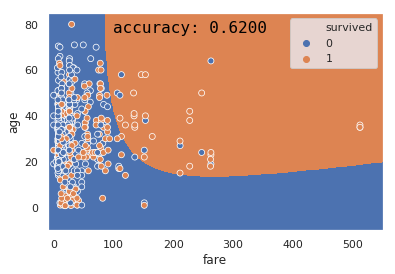

In [37]:
visualize_decision_boundaries(svm_model, [-10, 550], [-10, 85])
sns.scatterplot(data = p3_train, x = "fare", y = "age", hue = "survived")
#plt.text(0, -8, f"{b_and_w_to_string(svm_model.intercept_, svm_model.coef_)}", **title_font)
plt.text(100, 75, f"accuracy: {accuracy_score(p3_train['survived'], svm_model.predict(p3_train[['fare', 'age']])):.4f}", **title_font)
plt.savefig("svm_full_titanic_data_C1000_poly_svm.png", dpi = 300, bbox_inches = "tight")

In [38]:
svm_model = SVC(kernel = "rbf", C = 1)
svm_model.fit(X, y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

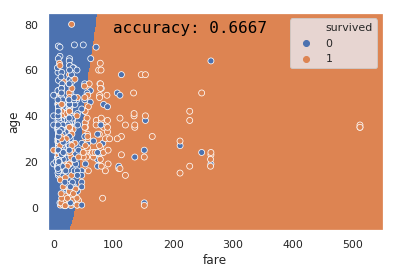

In [39]:
visualize_decision_boundaries(svm_model, [-10, 550], [-10, 85])
sns.scatterplot(data = p3_train, x = "fare", y = "age", hue = "survived")
#plt.text(0, -8, f"{b_and_w_to_string(svm_model.intercept_, svm_model.coef_)}", **title_font)
plt.text(100, 75, f"accuracy: {accuracy_score(p3_train['survived'], svm_model.predict(p3_train[['fare', 'age']])):.4f}", **title_font)
plt.savefig("svm_full_titanic_data_C1_rbf_svm.png", dpi = 300, bbox_inches = "tight")

In [40]:
svm_model = SVC(kernel = "rbf", C = 1000)
svm_model.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

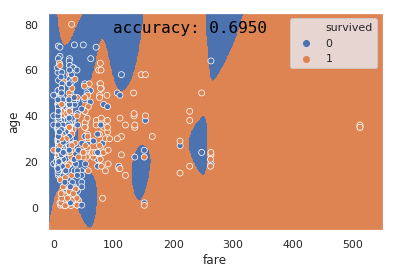

In [41]:
visualize_decision_boundaries(svm_model, [-10, 550], [-10, 85])
sns.scatterplot(data = p3_train, x = "fare", y = "age", hue = "survived")
#plt.text(0, -8, f"{b_and_w_to_string(svm_model.intercept_, svm_model.coef_)}", **title_font)
plt.text(100, 75, f"accuracy: {accuracy_score(p3_train['survived'], svm_model.predict(p3_train[['fare', 'age']])):.4f}", **title_font)
plt.savefig("svm_full_titanic_data_C1000_rbf_svm.png", dpi = 300, bbox_inches = "tight")

In [42]:
svm_model = SVC(kernel = "rbf", C = 100, gamma = 0.01)
svm_model.fit(X, y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

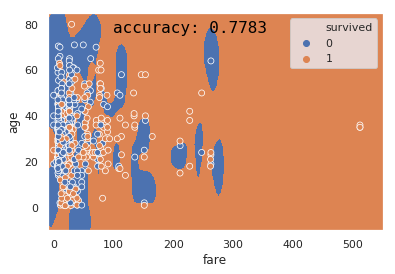

In [43]:
visualize_decision_boundaries(svm_model, [-10, 550], [-10, 85])
sns.scatterplot(data = p3_train, x = "fare", y = "age", hue = "survived")
#plt.text(0, -8, f"{b_and_w_to_string(svm_model.intercept_, svm_model.coef_)}", **title_font)
plt.text(100, 75, f"accuracy: {accuracy_score(p3_train['survived'], svm_model.predict(p3_train[['fare', 'age']])):.4f}", **title_font)
plt.savefig("svm_full_titanic_data_C100_gammapt01_rbf_svm.png", dpi = 300, bbox_inches = "tight")

In [44]:
svm_model = SVC(kernel = "rbf", C = 100, gamma = 0.1)
svm_model.fit(X, y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

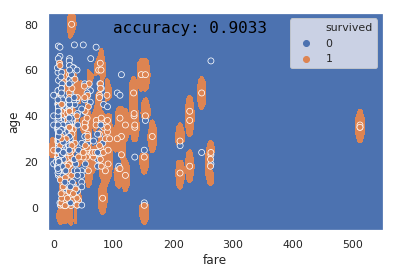

In [45]:
visualize_decision_boundaries(svm_model, [-10, 550], [-10, 85])
sns.scatterplot(data = p3_train, x = "fare", y = "age", hue = "survived")
#plt.text(0, -8, f"{b_and_w_to_string(svm_model.intercept_, svm_model.coef_)}", **title_font)
plt.text(100, 75, f"accuracy: {accuracy_score(p3_train['survived'], svm_model.predict(p3_train[['fare', 'age']])):.4f}", **title_font)
plt.savefig("svm_full_titanic_data_C100_gammapt1_rbf_svm.png", dpi = 300, bbox_inches = "tight")

In [46]:
svm_model = SVC(kernel = "rbf", C = 100, gamma = 0.5)
svm_model.fit(X, y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

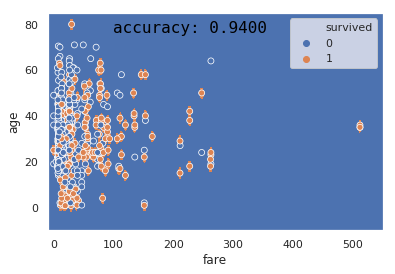

In [47]:
visualize_decision_boundaries(svm_model, [-10, 550], [-10, 85])
sns.scatterplot(data = p3_train, x = "fare", y = "age", hue = "survived")
#plt.text(0, -8, f"{b_and_w_to_string(svm_model.intercept_, svm_model.coef_)}", **title_font)
plt.text(100, 75, f"accuracy: {accuracy_score(p3_train['survived'], svm_model.predict(p3_train[['fare', 'age']])):.4f}", **title_font)
plt.savefig("svm_full_titanic_data_C100_gamma_pt5_rbf_svm.png", dpi = 300, bbox_inches = "tight")

And finally we'll explore the behavior of the RBF kernel.

In [48]:
svm_model = SVC(kernel = "rbf", C = 1000, gamma = 1000)
svm_model.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1000, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

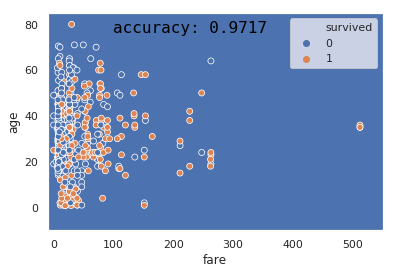

In [49]:
visualize_decision_boundaries(svm_model, [-10, 550], [-10, 85])
sns.scatterplot(data = p3_train, x = "fare", y = "age", hue = "survived")
#plt.text(0, -8, f"{b_and_w_to_string(svm_model.intercept_, svm_model.coef_)}", **title_font)
plt.text(100, 75, f"accuracy: {accuracy_score(p3_train['survived'], svm_model.predict(p3_train[['fare', 'age']])):.4f}", **title_font)
plt.savefig("svm_full_titanic_data_C1000_gamma1000_rbf_svm.png", dpi = 300, bbox_inches = "tight")

#### Toy Dataset For Understanding SVM

Below is a simple dataset we'll use to understand SVM in the lecture slides.

In [50]:
X = np.array([[-2, 2], [-1, 4], [-1, 1], [1, 2], [1, 3], [3, 3], [1, -3], [2, -3], [3, -2], [3, -4]])
y = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])
svm_model = SVC(kernel = "linear", C = 1e4)
svm_model.fit(X, y)

SVC(C=10000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

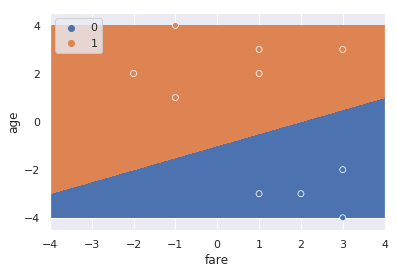

In [51]:
visualize_decision_boundaries(svm_model, [-4, 4], [-4, 4])
sns.scatterplot(X[:, 0], X[:, 1], y)

In [52]:
svm_model.coef_


array([[-0.2,  0.4]])

Here is a somewhat more complex dataset that we'll use to understand margins for the soft margin SVM.

In [53]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, random_state = 8)
X = np.vstack([X, [-0.5, 0], [-0.5, 1]])
y = np.append(y, [0, 0])

In [54]:
y

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

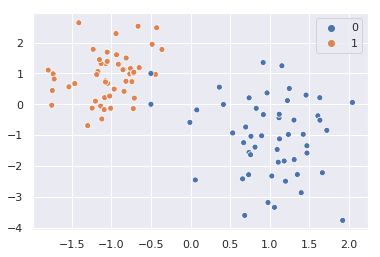

In [55]:
sns.scatterplot(X[:, 0], X[:, 1], y)
#plt.savefig("data_for_soft_margin_SVM.png", dpi = 300, bbox_inches = "tight")

In [56]:
def visualize_decision_boundaries(model, x_range, y_range):
    xx, yy = np.meshgrid(np.linspace(x_range[0], x_range[1], 500),
                     np.linspace(y_range[0], y_range[1], 500))

    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])
    y_hat = model.predict(np.c_[xx.ravel(), yy.ravel()])
    y_hat = y_hat.reshape(xx.shape)

    cs = plt.contourf(xx, yy, y_hat, cmap=sns_cmap)

In [57]:
def svm_for_given_C(cval):
    svm_model = SVC(kernel = "linear", C = cval)
    svm_model.fit(X, y)
    visualize_decision_boundaries(svm_model, [-2, 4], [-4, 4])
    plt.text(-1.5, 3, f"C: {cval}", **title_font)
    sns.scatterplot(X[:, 0], X[:, 1], y)
    print()
    plt.savefig(f"svm_for_c{cval}.png", dpi = 300, bbox_inches = "tight")

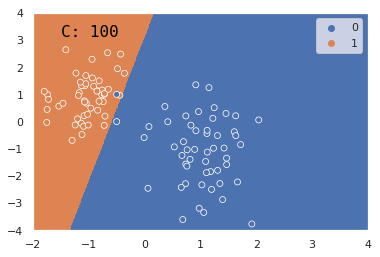

In [58]:
svm_for_given_C(100)

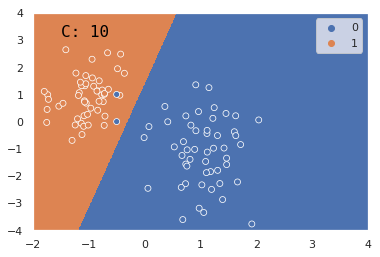

In [59]:
svm_for_given_C(10)

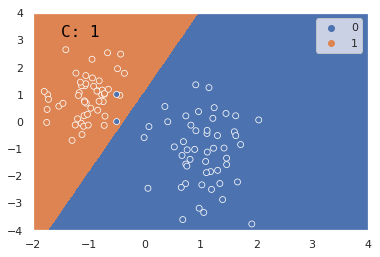

In [60]:
svm_for_given_C(1)

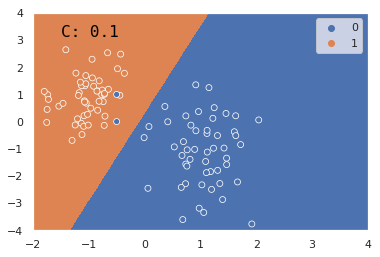

In [61]:
svm_for_given_C(0.1)

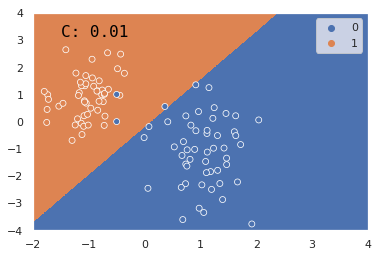

In [62]:
svm_for_given_C(0.01)

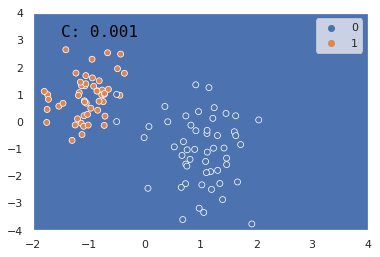

In [63]:
svm_for_given_C(0.001)

The code below visualized decision boundaries but also includes the margin. Code adapted from a stack overflow post that I've lost track of.

In [64]:
def visualize_svm_decision_boundaries_with_margin(model, x_range, y_range):
    xx, yy = np.meshgrid(np.linspace(x_range[0], x_range[1], 500),
                     np.linspace(y_range[0], y_range[1], 500))

    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])
    y_hat = model.predict(np.c_[xx.ravel(), yy.ravel()])
    y_hat = y_hat.reshape(xx.shape)
        
    cs = plt.contourf(xx, yy, y_hat, cmap=sns_cmap)
    
    w = model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(x_range[0], x_range[1])
    yy = a * xx - (model.intercept_[0]) / w[1]  
    
    margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')    
    

In [65]:
def svm_with_margin_for_given_C(cval):
    svm_model = SVC(kernel = "linear", C = cval)
    svm_model.fit(X, y)
    x_range = [-2, 4]
    y_range = [-4, 4]
    visualize_svm_decision_boundaries_with_margin(svm_model, x_range, y_range)
    plt.text(-1.5, 3, f"C: {cval}", **title_font)
    sns.scatterplot(X[:, 0], X[:, 1], y)    
    plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.savefig(f"svm_for_c{cval}_with_margin.png", dpi = 300, bbox_inches = "tight")

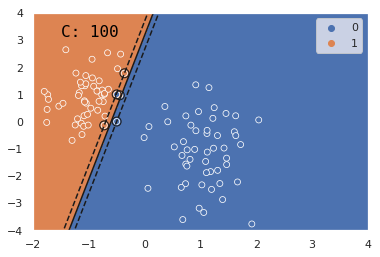

In [66]:
svm_with_margin_for_given_C(100)

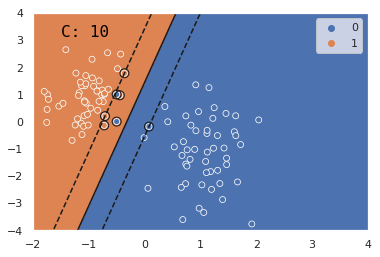

In [67]:
svm_with_margin_for_given_C(10)

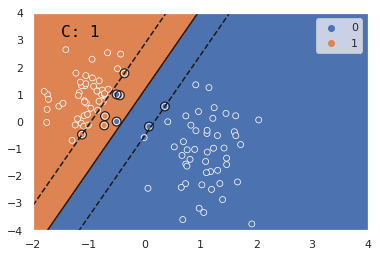

In [68]:
svm_with_margin_for_given_C(1)

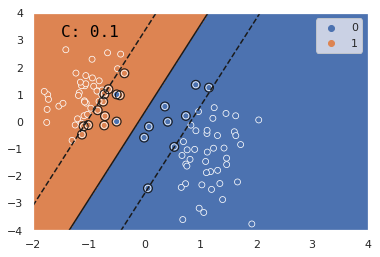

In [69]:
svm_with_margin_for_given_C(0.1)

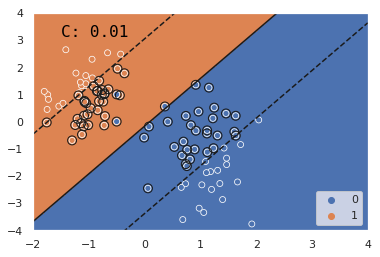

In [70]:
svm_with_margin_for_given_C(0.01)

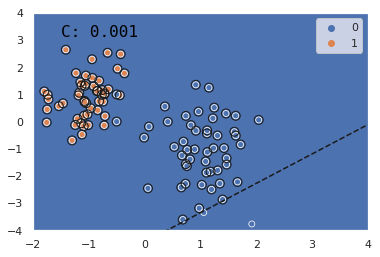

In [71]:
svm_with_margin_for_given_C(0.001)

### Nonlinear Decision Boundaries

Below, we'll explore how we can get nonlinear decision boundaries if we:
1. Use explicitly added features.
2. Use the poly and rbf kernels.

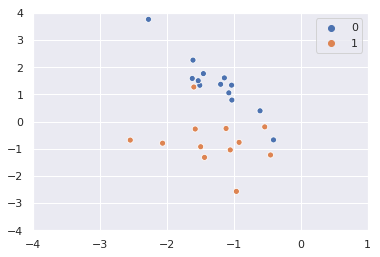

In [75]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 25, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, random_state = 125)
sns.scatterplot(X[:, 0], X[:, 1], y)
plt.xlim([-4, 1])
plt.ylim([-4, 4])
#plt.savefig("toy_data_for_showing_poly_kernel.png", dpi = 300, bbox_inches = "tight")

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [77]:
def show_explicit_polynomial_svm_boundaries(degree, C):
    explicit_poly_svm_model = Pipeline([
        ('poly', PolynomialFeatures(degree = degree)),
        ('model', SVC(kernel = "linear", C = C))
    ])
    explicit_poly_svm_model.fit(X, y)
    visualize_decision_boundaries(explicit_poly_svm_model, [-4, 1], [-4, 4])
    sns.scatterplot(X[:, 0], X[:, 1], y)

In [78]:
def show_polynomial_kernel_svm_boundaries(degree, C):
    kernel_poly_svm_model = SVC(kernel = "poly", degree = degree, C = C)
    kernel_poly_svm_model.fit(X, y)
    visualize_decision_boundaries(kernel_poly_svm_model, [-4, 1], [-4, 4])
    sns.scatterplot(X[:, 0], X[:, 1], y)

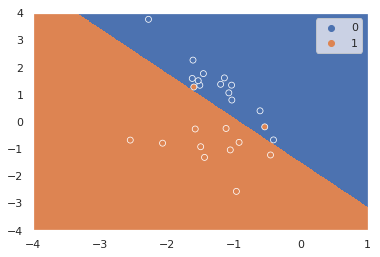

In [79]:
show_explicit_polynomial_svm_boundaries(1, 1e7)
#plt.savefig("degree1_explicit_features.png", dpi = 300, bbox_inches = "tight")

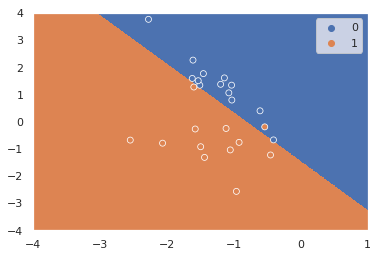

In [80]:
show_polynomial_kernel_svm_boundaries(1, 1e7)
#plt.savefig("degree1_kernel_features.png", dpi = 300, bbox_inches = "tight")

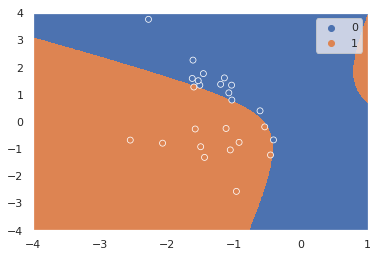

In [81]:
show_explicit_polynomial_svm_boundaries(2, 1e7)
#plt.savefig("degree2_explicit_features.png", dpi = 300, bbox_inches = "tight")

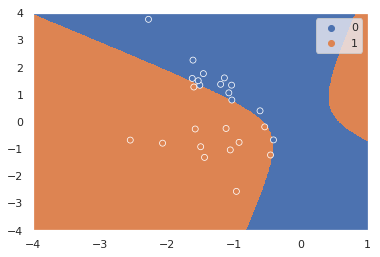

In [82]:
show_polynomial_kernel_svm_boundaries(2, 1e7)
#plt.savefig("degree2_kernel_features.png", dpi = 300, bbox_inches = "tight")

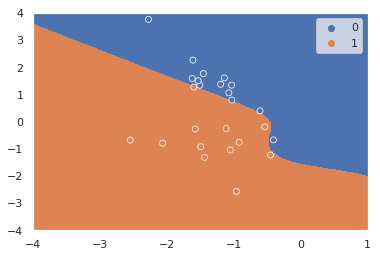

In [83]:
show_explicit_polynomial_svm_boundaries(3, 1e7)
#plt.savefig("degree3_explicit_features.png", dpi = 300, bbox_inches = "tight")

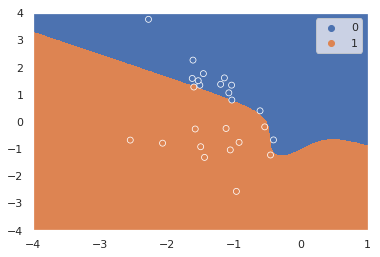

In [84]:
show_polynomial_kernel_svm_boundaries(3, 1e7)
#plt.savefig("degree3_kernel_features.png", dpi = 300, bbox_inches = "tight")

Now let's try to do some real data science on our titanic dataset. From here on out, we're going to be scaling our data with a standard scaler.

In [85]:
X = p3_train[["fare", "age"]].to_numpy()
y = p3_train["survived"].to_numpy()

First we consider what happens if we manually create features with the PolynomialFeatures module.

In [86]:
ss = StandardScaler()
ss.fit(X)
scaledX = ss.transform(X)
pd.DataFrame(scaledX, columns = ["fare", "age"])

,fare,age
0,-0.522393,-0.546510
1,0.626219,0.554365
2,-0.510285,-0.271291
3,0.300052,0.347951
4,-0.508043,0.347951
...,...,...
595,0.300052,-0.752924
596,-0.513424,0.072732
597,-0.239874,-1.784994
598,-0.428668,-1.647385


In [88]:
pf = PolynomialFeatures(degree = 2)
pf.fit(scaledX)
polyScaledX = pf.transform(scaledX)
pd.DataFrame(polyScaledX, columns = ["bias", "fare", "age", "fare^2", "fare x age", "age^2"])

,bias,fare,age,fare^2,fare x age,age^2
0,1.0,-0.522393,-0.546510,0.272894,0.285493,0.298673
1,1.0,0.626219,0.554365,0.392150,0.347154,0.307321
2,1.0,-0.510285,-0.271291,0.260391,0.138436,0.073599
3,1.0,0.300052,0.347951,0.090031,0.104403,0.121070
4,1.0,-0.508043,0.347951,0.258107,-0.176774,0.121070
...,...,...,...,...,...,...
595,1.0,0.300052,-0.752924,0.090031,-0.225916,0.566894
596,1.0,-0.513424,0.072732,0.263604,-0.037343,0.005290
597,1.0,-0.239874,-1.784994,0.057539,0.428173,3.186204
598,1.0,-0.428668,-1.647385,0.183756,0.706182,2.713877


We can use the code below to explore the runtimes as a function of the degree.

In [91]:
explicit_poly_svm_model = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree = 1)),
    ('model', SVC(kernel = "linear", C = 1))
])
%time explicit_poly_svm_model.fit(X, y)

CPU times: user 15.6 ms, sys: 15.6 ms, total: 31.2 ms
Wall time: 6.42 ms


Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

If we use a kernel polynomial, the resulting code will be much much faster.

In [92]:
kernel_poly_svm_model = Pipeline([
    ('scale', StandardScaler()),
    ('model', SVC(kernel = "poly", degree = 1, C = 1))
])
%time kernel_poly_svm_model.fit(X, y)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 6.93 ms


Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=1,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

We can use the code below to see the decision boundaries for RBF SVM models.

In [165]:
def show_svm_decision_boundary_given_C_and_gamma(C, gamma, show_support_vectors = False):
    #svm_model = SVC(kernel = "rbf", C = C, gamma = gamma)
    svm_model = Pipeline([
        ('scale', StandardScaler()),
        ('model', SVC(kernel = "rbf", C = C, gamma = gamma))
    ])    
    svm_model.fit(X, y)
    visualize_decision_boundaries(svm_model, [-10, 550], [-10, 85])
    sns.scatterplot(data = p3_train, x = "fare", y = "age", hue = "survived")
    if show_support_vectors:
        ss = StandardScaler()
        ss.fit(X)        
        svx1_scaled = svm_model.named_steps["model"].support_vectors_[:, 0]
        svx2_scaled = svm_model.named_steps["model"].support_vectors_[:, 1]
        sv_scaled = (np.vstack([svx1_scaled, svx2_scaled])).T
        sv = ss.inverse_transform(sv_scaled)
        plt.scatter(sv[:, 0], sv[:, 1], s=80,
                    facecolors='none', zorder=10, edgecolors='k')
    plt.text(100, 75, f"accuracy: {accuracy_score(p3_train['survived'], svm_model.predict(p3_train[['fare', 'age']])):.4f}", **title_font)
    #plt.savefig(f"svm_full_titanic_data_C{C}_gamma{gamma}_rbf_svm.png", dpi = 300, bbox_inches = "tight")

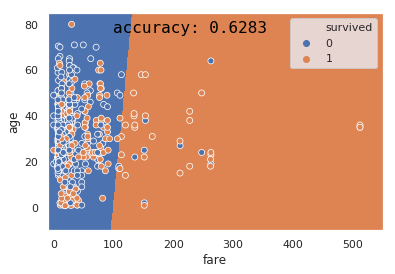

In [166]:
show_svm_decision_boundary_given_C_and_gamma(100, 0.0001)

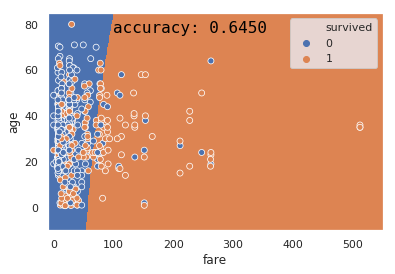

In [126]:
show_svm_decision_boundary_given_C_and_gamma(100, 0.001)

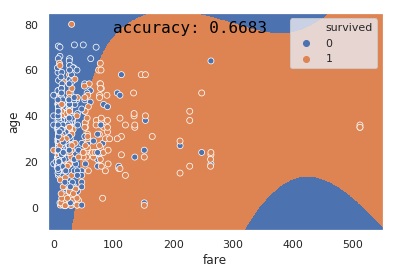

In [127]:
show_svm_decision_boundary_given_C_and_gamma(100, 0.01)

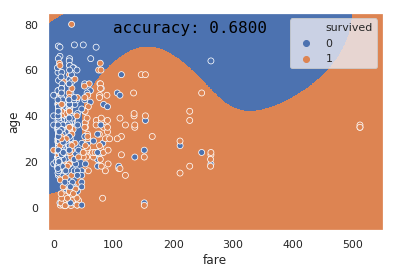

In [128]:
show_svm_decision_boundary_given_C_and_gamma(100, 0.05)

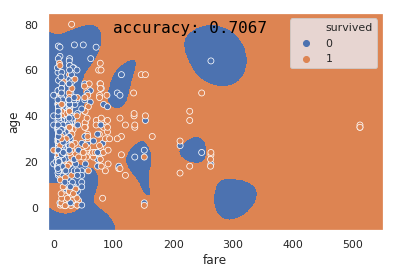

In [130]:
show_svm_decision_boundary_given_C_and_gamma(100, 1)

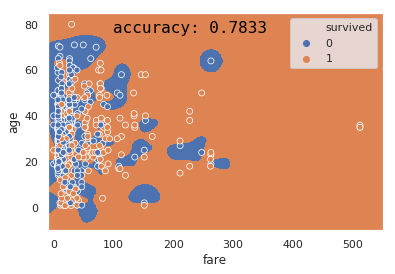

In [131]:
show_svm_decision_boundary_given_C_and_gamma(100, 10)

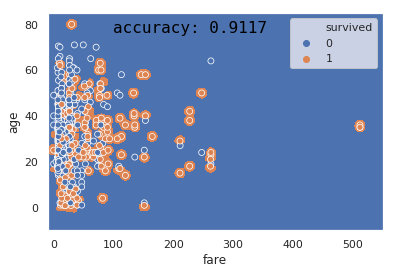

In [136]:
show_svm_decision_boundary_given_C_and_gamma(100, 100)

Lastly, we review how we can use cross validation to select hyperparameters for our model.

In [139]:
from sklearn.model_selection import GridSearchCV

svm_model = Pipeline([
    ('scale', StandardScaler()),
    ('model', SVC(kernel = "rbf"))
])    

parameters = {'model__C': [0.01, 0.1, 1, 10, 100],
              'model__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

svm_model_finder = GridSearchCV(svm_model, parameters, cv=10, scoring = "accuracy")
svm_model_finder.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.0

In [140]:
svm_model_finder.best_params_

{'model__C': 10, 'model__gamma': 0.1}

In [141]:
svm_model_finder.best_score_

0.67

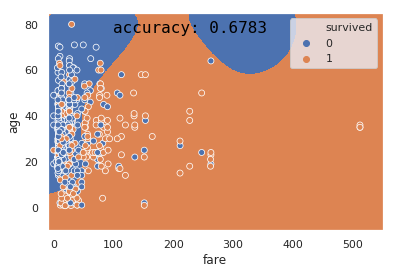

In [142]:
show_svm_decision_boundary_given_C_and_gamma(10, 0.1)

Our best model gets an accuracy of 72% of the unseen test set.

In [146]:
accuracy_score(svm_model_finder.predict(p3_test[["fare", "age"]]), p3_test["survived"])

0.7192982456140351